<a href="https://colab.research.google.com/github/Harshini-19-git/projects/blob/main/KNN%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [ ]:
data = pd.read_csv("data.csv")
print(data.columns)
labels = data["diagnosis"]
data = data.drop(["id", "diagnosis", "Unnamed: 32"], axis=1)

X_temp, X_test, y_temp, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, shuffle=True)


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
print(data.isnull().sum())
print(data.shape)
print(data.duplicated().sum())

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
(569, 30)
0


/tmp/ipython-input-48634326.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=all_labels, palette="Set2")


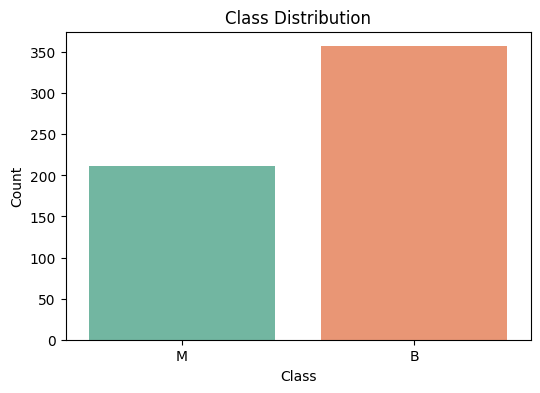

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Class distribution in y_train and y_test combined
all_labels = np.concatenate([y_train, y_test,y_val])

plt.figure(figsize=(6, 4))
sns.countplot(x=all_labels, palette="Set2")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [ ]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def hamming_distance(a, b):
    return np.mean(a != b)

class KNN:
    def __init__(self, train_x, train_y, val_x, val_y, k_vals=None):
        self.train_x = np.asarray(train_x)
        self.train_y = np.asarray(train_y)
        self.val_x = np.asarray(val_x)
        self.val_y = np.asarray(val_y)
        if k_vals is None:
            k_vals = [3, 4, 9, 20, 47]
        best_k = None
        best_metric = None
        best_acc = -1.0
        metrics = [
            ("euclidean", euclidean_distance),
            ("manhattan", manhattan_distance),
            ("cosine", cosine_similarity),
            ("hamming", hamming_distance),
        ]
        self.accuracies = {}
        for k in k_vals:
            for name, func in metrics:
                correct = 0
                n = len(self.val_x)
                for i in range(n):
                    pred = self.predict(self.val_x[i], func, k)
                    if self.val_y[i] == pred:
                        correct += 1
                acc = correct / n if n > 0 else 0.0
                self.accuracies[(k, name)] = acc
                if acc > best_acc:
                    best_acc = acc
                    best_k = k
                    best_metric = name
        self.best_k = best_k
        self.best_metric = best_metric
        print("Best k:", self.best_k)
        print("Best metric:", self.best_metric)
        self.plot_accuracies()

    def predict(self, x, distance_metric, k):
        distances = []
        for i in range(len(self.train_x)):
            d = distance_metric(self.train_x[i], x)
            if distance_metric is cosine_similarity:
                d = 1.0 - d
            distances.append((self.train_y[i], d))
        distances.sort(key=lambda t: t[1])
        neighbors = distances[:k]
        labels = [lab for lab, _ in neighbors]
        prediction = max(set(labels), key=labels.count)
        return prediction





    def visualize(self, test_x, test_y_labels):
        train_x = np.asarray(self.train_x, dtype=float)
        train_y = np.asarray(self.train_y)
        test_x = np.asarray(test_x, dtype=float)
        test_y = np.asarray(test_y_labels)
        scaler = StandardScaler().fit(train_x)
        train_s = scaler.transform(train_x)
        test_s = scaler.transform(test_x)
        pca = PCA(n_components=2)
        X_train_2d = pca.fit_transform(train_s)
        X_test_2d = pca.transform(test_s)
        unique_labels = np.unique(np.concatenate([train_y, test_y]))
        label_to_num = {lab: i for i, lab in enumerate(unique_labels)}
        train_colors = [label_to_num[l] for l in train_y]
        test_colors = [label_to_num[l] for l in test_y]
        plt.figure(figsize=(10, 6))
        cmap = plt.get_cmap('coolwarm', len(unique_labels))
        plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1],
                    c=train_colors, cmap=cmap, edgecolor='k', s=40, label='Train')
        plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1],
                    c=test_colors, cmap=cmap, marker='x', s=60, label='Test')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f"KNN projection (k={getattr(self,'best_k',None)}, metric={getattr(self,'best_metric',None)})")
        handles = []
        for lab, idx in label_to_num.items():
            handles.append(plt.Line2D([0], [0], marker='o', color='w',
                                      markerfacecolor=cmap(idx), markeredgecolor='k', markersize=8, label=str(lab)))
        plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()


    def evaluate(self, test_x, test_y):
        test_x = np.asarray(test_x)
        test_y = np.asarray(test_y)
        correct = 0
        n = len(test_x)
        metric_func = {
            'euclidean': euclidean_distance,
            'manhattan': manhattan_distance,
            'cosine': cosine_similarity,
            'hamming': hamming_distance
        }[self.best_metric]
        res = list()
        for i in range(n):
            pred = self.predict(test_x[i], metric_func, self.best_k)
            res.append(pred)
            if test_y[i] == pred:
                correct += 1
        self.visualize(test_x, res)
        cm = confusion_matrix(test_y, res, labels=np.unique(test_y))
        recall = recall_score(test_y, res, average='macro')
        precision = precision_score(test_y, res, average='macro')
        print("Confusion Matrix:\n", cm)
        print("Recall:", recall)
        print("Precision:", precision)
        return correct / n if n > 0 else 0.0



    def plot_accuracies(self):
        metrics = sorted(set(metric for _, metric in self.accuracies.keys()))
        plt.figure(figsize=(8, 6))
        for metric in metrics:
            k_vals = sorted(k for k, m in self.accuracies.keys() if m == metric)
            acc_vals = [self.accuracies[(k, metric)] for k in k_vals]
            plt.plot(k_vals, acc_vals, marker='o', label=metric)
        plt.xlabel("K values")
        plt.ylabel("Accuracy")
        plt.title("K values vs Accuracy for different distance metrics")
        plt.legend()
        plt.grid(True)
        plt.show()






Best k: 4
Best metric: euclidean


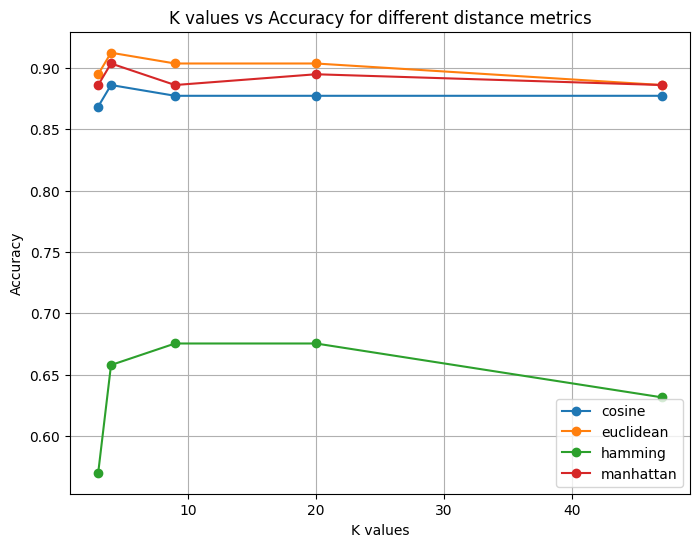

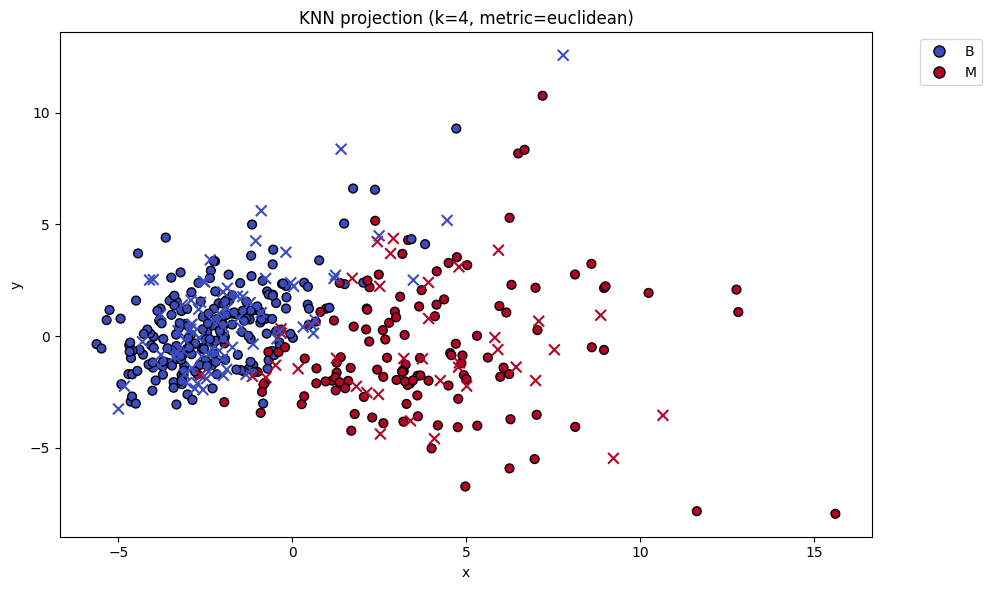

Confusion Matrix:
 [[69  2]
 [ 7 36]]
Recall: 0.9045201441205373
Precision: 0.9276315789473684
Model Accuracy:  0.9210526315789473


In [ ]:
knn_model = KNN(X_train, y_train, X_val, y_val)
print("Model Accuracy: ", knn_model.evaluate(X_test, y_test))